### Keterangan

## Import Library

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint

## Membaca Data

In [31]:
df= pd.read_csv('data.csv')

In [32]:
df.head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7


## preprocessing Data

### Cek missing value

In [33]:
df.isna().sum()

Date                      0
Province                  0
Daily_Case                0
Daily_Death               0
Daily_Recovered           0
Active_Case               0
Cumulative_Case           0
Cumulative_Recovered      0
Cumulative_Death          0
Cumulative_Active_Case    0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17613 entries, 0 to 17612
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    17613 non-null  object
 1   Province                17613 non-null  object
 2   Daily_Case              17613 non-null  int64 
 3   Daily_Death             17613 non-null  int64 
 4   Daily_Recovered         17613 non-null  int64 
 5   Active_Case             17613 non-null  int64 
 6   Cumulative_Case         17613 non-null  int64 
 7   Cumulative_Recovered    17613 non-null  int64 
 8   Cumulative_Death        17613 non-null  int64 
 9   Cumulative_Active_Case  17613 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.3+ MB


In [35]:
# Mengurutkan Tanggal
df = df.sort_values(by='Date')

In [36]:
# mengubah tipe data dari objek menjadi tipe data Date and Time
df['Date']=pd.to_datetime(df['Date'])

## Pembagian Kelompok kedalam tiga Variabel
#### Susceptible (S), yang merupakan individu yang rentan terhadap infeksi penyakit.
#### Infected (I), yang merupakan individu yang sedang terinfeksi penyakit.
#### Recovered (R), yang merupakan individu yang sudah sembuh dari penyakit dan menjadi imun terhadap infeksi di masa yang akan datang.

In [42]:
jumlah_penduduk_2020 = 270.20 # dalam juta jiwa
jumlah_penduduk_2021 =  272.68 # dalam juta jiwa
rata_rata = jumlah_penduduk_2020 + jumlah_penduduk_2021/2

In [46]:
S = 406.539 - df['Cumulative_Active_Case'] - df['Cumulative_Death']
a=S.sum()
print(a)
I = df['Cumulative_Active_Case']
R = df['Cumulative_Recovered']

-63844852.593


### Inisialisasi parameter SIR

In [47]:
N = 270000000 # Jumlah populasi
I0 = 1 # Jumlah kasus awal
R0 = 0 # Jumlah kasus sembuh awal
S0 = N - I0 - R0 # Jumlah populasi yang rentan pada awal wabah
beta = 0.2 # Laju penularan
gamma = 0.1 # Laju kesembuhan
t = np.linspace(0, 365, 365) # Waktu simulasi dalam hari

### Persamaan diferensial SIR

In [48]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

### Menyelesaikan persamaan diferensial SIR

In [50]:
y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

## Visualisasi Data

C:\Users\deo pandia\AppData\Local\Temp\ipykernel_5968\2183401076.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


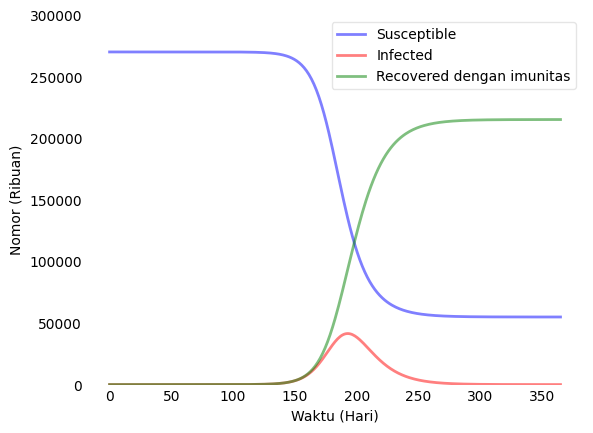

In [68]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered dengan imunitas')
ax.set_xlabel('Waktu (Hari)')
ax.set_ylabel('Nomor (Ribuan)')
ax.set_ylim(0,300000)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.grid()
plt.show();

C:\Users\deo pandia\AppData\Local\Temp\ipykernel_5968\2744535536.py:12: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


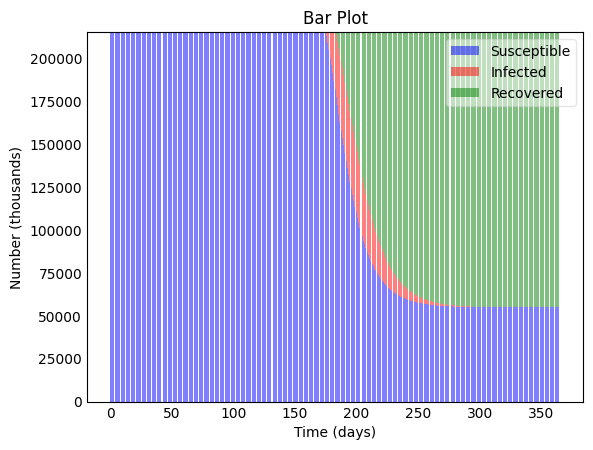

In [70]:
# Memplot hasil simulasi
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.bar(t, S/1000, color='b', alpha=0.5, label='Susceptible')
ax.bar(t, I/1000, color='r', alpha=0.5, label='Infected', bottom=S/1000)
ax.bar(t, R/1000, color='g', alpha=0.5, label='Recovered', bottom=(S+I)/1000)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (thousands)')
ax.set_ylim(0, max(R/1000)+1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.title('Bar Plot')
plt.show() 


C:\Users\deo pandia\AppData\Local\Temp\ipykernel_5968\3998355021.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


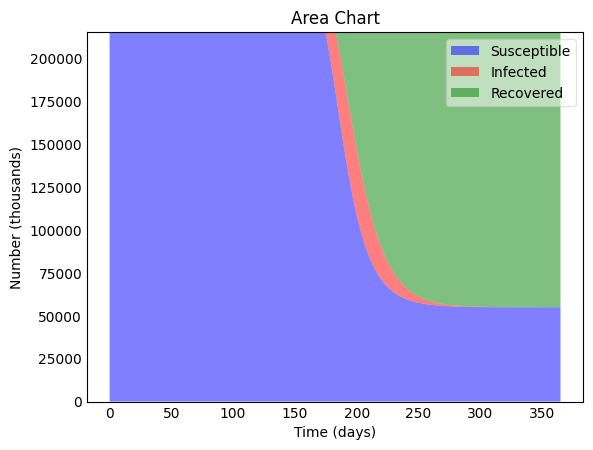

In [71]:
# Memplot hasil simulasi
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.stackplot(t, S/1000, I/1000, R/1000, labels=['Susceptible', 'Infected', 'Recovered'], colors=['b', 'r', 'g'], alpha=0.5)
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (thousands)')
ax.set_ylim(0, max(R/1000)+1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.title('Area Chart')
plt.show()


## Hasil
### Dari hasil analisa diatas maka dapat diambil kesimpulan bahwa kasus covid-19 di indonesia mengalami penurunan di antara tahun 2020-2021 dan dapat dilihat dari variabel Suceptible (S) yang mengalami penurunan dihari hampir ke 200, Variable Infected (I) terdapat kenaikan hampir mencapai 50.000 kasus dihari ke 200, Variabel Recovered juga mengalami kenaikan yang tinggi dimulai hari ke 150.